# Лабораторна робота №5

## Побудова ансамблiв моделей регресiї засобами бiблiотеки Scikit-Learn 

Виконав студент 3 курсу

групи КА-02

Шинкарьов О.О.

Перевірила Недашківська Н.І.

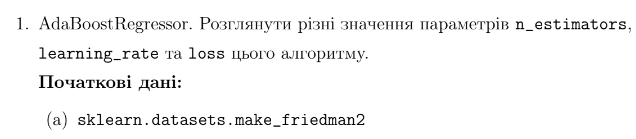

In [1]:
#імпорт необхідних бібліотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%precision 5
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_friedman2

In [3]:
#генерація датасету
friedman_arr = make_friedman2(n_samples=1000, random_state=42)
friedman_df = pd.DataFrame(friedman_arr[0], columns=['x1', 'x2', 'x3', 'x4'])
friedman_df['y'] = friedman_arr[1]

In [4]:
friedman_df

,x1,x2,x3,x4,y
0,37.454012,1678.777388,0.731994,6.986585,1229.425437
1,15.601864,380.500750,0.058084,9.661761,27.052801
2,60.111501,1282.391023,0.020584,10.699099,65.652189
3,83.244264,472.546861,0.181825,2.834045,119.632212
4,30.424224,982.920600,0.431945,3.912291,425.656091
...,...,...,...,...,...
995,83.236354,1441.794298,0.224319,3.260791,333.960234
996,81.730531,1645.588784,0.095361,5.500586,176.932918
997,33.745428,1548.044903,0.083525,3.111259,133.631106
998,75.246834,209.458783,0.492535,5.421070,127.691422


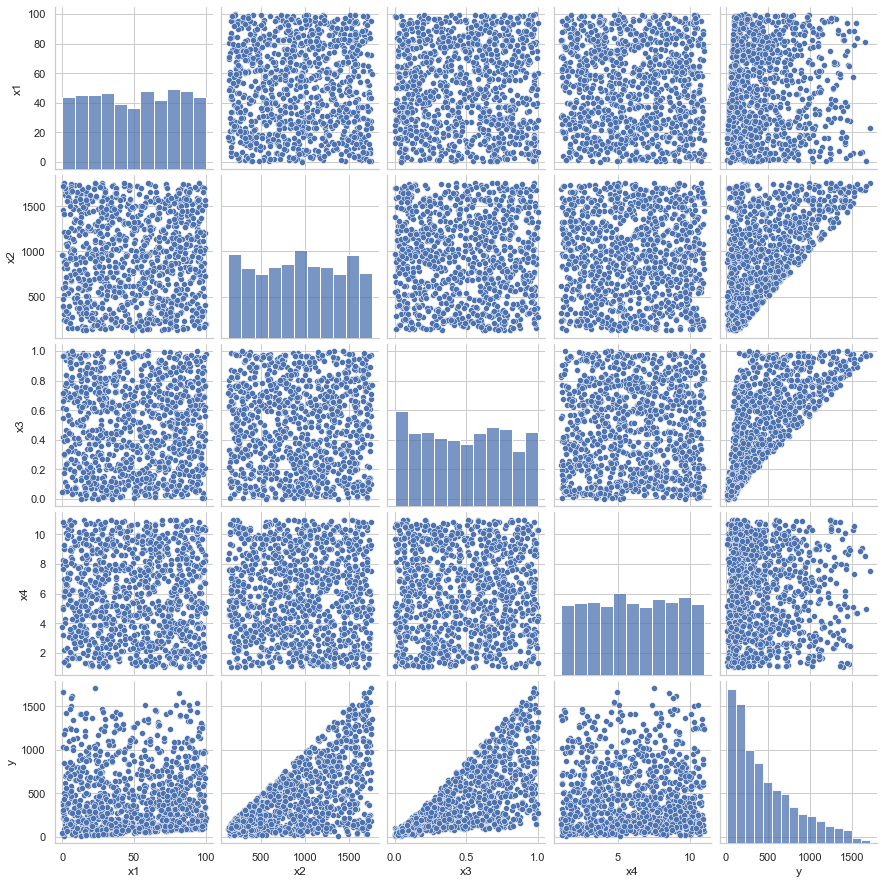

In [5]:
#подивимося на попарну залежність фічей та спробуємо знайти якусь закономірнсть
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(friedman_df, height = 2.5)
plt.show()

Бачимо, що х1, х2, х3, х4 скоріш за все є вибіркою з рівномірного розподілу, але на різних проміжках, а розподіл з якого отримано у скоріш за все є показниковим

Побудуємо точкові графіки, на яких y залежить від xi, xk (i!=k; i,k є {1, 2, 3, 4})

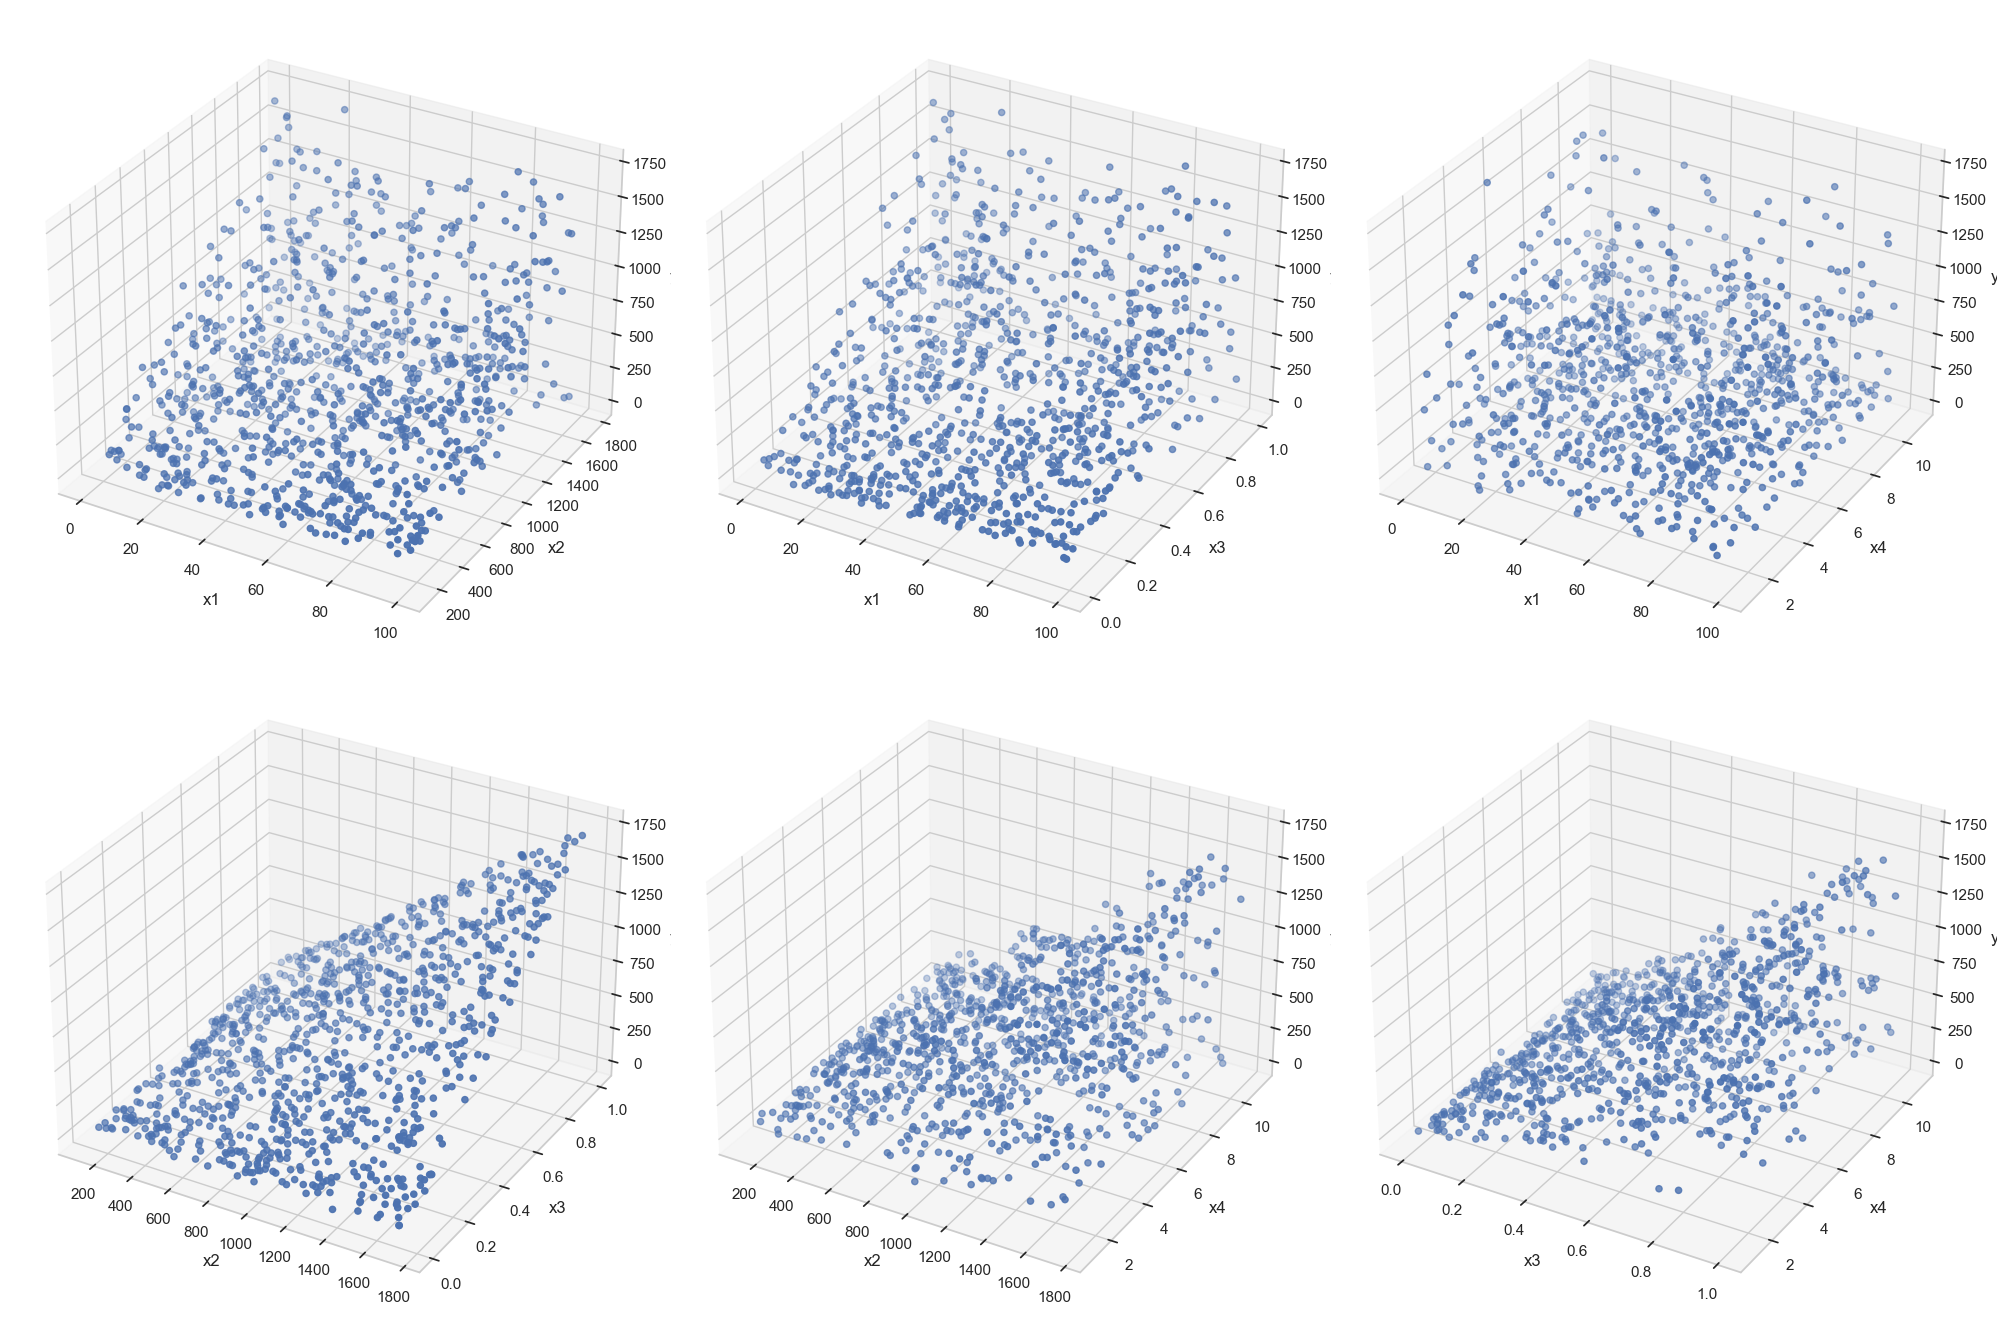

In [6]:
fig = plt.figure(tight_layout=True, figsize=(20, 20))
gs = gridspec.GridSpec(3, 3)

ax = fig.add_subplot(gs[0, 0], projection="3d")
ax.scatter(friedman_df.x1, friedman_df.x2, friedman_df.y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[0, 1], projection="3d")
ax.scatter(friedman_df.x1, friedman_df.x3, friedman_df.y)
ax.set_xlabel("x1")
ax.set_ylabel("x3")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[0, 2], projection="3d")
ax.scatter(friedman_df.x1, friedman_df.x4, friedman_df.y)
ax.set_xlabel("x1")
ax.set_ylabel("x4")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[1, 0], projection="3d")
ax.scatter(friedman_df.x2, friedman_df.x3, friedman_df.y)
ax.set_xlabel("x2")
ax.set_ylabel("x3")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[1, 1], projection="3d")
ax.scatter(friedman_df.x2, friedman_df.x4, friedman_df.y)
ax.set_xlabel("x2")
ax.set_ylabel("x4")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[1, 2], projection="3d")
ax.scatter(friedman_df.x3, friedman_df.x4, friedman_df.y)
ax.set_xlabel("x3")
ax.set_ylabel("x4")
ax.set_zlabel("y")

plt.show()

In [7]:
#розіб'ємо набір на тренувальний, валідаційний та тестовий (можливо буде необхідно скористатися командою pip install fast_ml)

from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(friedman_df, target = 'y', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

#функція для підрахунку метрик моделей

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score

def metrics(X, y, model):
    print('R^2 : ', r2_score(y, model.predict(X)))
    print('RMSE: ', np.sqrt(mean_squared_error(y, model.predict(X))))
    print('MAPE: ', mean_absolute_percentage_error(y, model.predict(X)))
    print('MAE : ', mean_absolute_error(y, model.predict(X)))

Спробуємо підібрати оптимальну базову модель для бустінга

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [9]:
#лінійна регресія
%%time
print('----------------------------')
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
metrics(X_train, y_train, lr_model)
print('----------------------------')

----------------------------
R^2 :  0.8617354305776614
RMSE:  141.09183797302458
MAPE:  0.7870578778423705
MAE :  105.98203867772953
----------------------------
Wall time: 39.7 ms


In [10]:
#опорні вектори
%%time
print('----------------------------')
svr_model = SVR()
svr_model.fit(X_train, y_train)
metrics(X_train, y_train, svr_model)
print('----------------------------')

----------------------------
R^2 :  0.06859198032882297
RMSE:  366.198385043368
MAPE:  1.2348793517462289
MAE :  272.5451862427097
----------------------------
Wall time: 351 ms


In [11]:
#дерево рішень, що э дефолтним естіматором для AdaBoostRegressor
%%time
print('----------------------------')
dec_tr_model1 = DecisionTreeRegressor(max_depth=3)
dec_tr_model1.fit(X_train, y_train)
metrics(X_train, y_train, dec_tr_model1)
print('----------------------------')

----------------------------
R^2 :  0.8916552976049922
RMSE:  124.89650301173825
MAPE:  0.3430355902628301
MAE :  94.30420015746238
----------------------------
Wall time: 16.1 ms


In [12]:
#ще одне дерево рішень
%%time
print('----------------------------')
dec_tr_model2 = DecisionTreeRegressor(max_depth=5)
dec_tr_model2.fit(X_train, y_train)
metrics(X_train, y_train, dec_tr_model2)
print('----------------------------')

----------------------------
R^2 :  0.9788536937681237
RMSE:  55.17771311075381
MAPE:  0.1330390213928374
MAE :  40.600064600679
----------------------------
Wall time: 16 ms


Побудуємо моделі за допомогою AdaBoostRegressor, взявши за базові естіматори наведені вище моделі. Моделі тренуються на тренувальному наборі, метрики обраховуються на тренувальному та тестовому наборах

In [13]:
from sklearn.ensemble import AdaBoostRegressor

In [14]:
%%time
adaboost1 = AdaBoostRegressor(random_state=42)
adaboost1.fit(X_train, y_train)
print('Train:----------------------')
metrics(X_train, y_train, adaboost1)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, adaboost1)
print('----------------------------')

Train:----------------------
R^2 :  0.9735438300461918
RMSE:  61.71772714780194
MAPE:  0.3254146738757647
MAE :  51.63590901056572
----------------------------
Valid:----------------------
R^2 :  0.9727136426419901
RMSE:  67.24977419056388
MAPE:  0.33903947368086174
MAE :  56.311132698080115
----------------------------
Wall time: 192 ms


In [15]:
%%time
adaboost2 = AdaBoostRegressor(dec_tr_model2, random_state=42)
adaboost2.fit(X_train, y_train)
print('Train:----------------------')
metrics(X_train, y_train, adaboost2)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, adaboost2)
print('----------------------------')

Train:----------------------
R^2 :  0.9964840993716748
RMSE:  22.499078664410668
MAPE:  0.11739456506354651
MAE :  18.936686154899736
----------------------------
Valid:----------------------
R^2 :  0.9937503033549109
RMSE:  32.18455567944845
MAPE:  0.1368236097069243
MAE :  25.494591128896044
----------------------------
Wall time: 232 ms


In [16]:
%%time
adaboost3 = AdaBoostRegressor(base_estimator=lr_model, random_state=42)
adaboost3.fit(X_train, y_train)
print('Train:----------------------')
metrics(X_train, y_train, adaboost3)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, adaboost3)
print('----------------------------')

Train:----------------------
R^2 :  0.8640680878960528
RMSE:  139.89659727209224
MAPE:  0.7677098091868652
MAE :  105.60905651861877
----------------------------
Valid:----------------------
R^2 :  0.8729072614616248
RMSE:  145.13709226592306
MAPE:  0.7732052477726657
MAE :  108.88245381159427
----------------------------
Wall time: 56.6 ms


In [17]:
%%time
adaboost4 = AdaBoostRegressor(base_estimator=svr_model, random_state=42)
adaboost4.fit(X_train, y_train)
print('Train:----------------------')
metrics(X_train, y_train, adaboost4)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, adaboost4)
print('----------------------------')

Train:----------------------
R^2 :  0.16717099197267238
RMSE:  346.2775690283873
MAPE:  1.6099031331950038
MAE :  278.66770638851114
----------------------------
Valid:----------------------
R^2 :  0.17897800056415003
RMSE:  368.8887801532487
MAPE:  1.583475796494913
MAE :  291.6178515781716
----------------------------
Wall time: 2.54 s


Бачимо що бустінг з деревом рішень з максимальною глибиною 5 в якості базового естіматора дає найкращі показники в метриках та є доволі швидким алгоритмом, тому для подальших досліджень використаємо його.

Спробумо знайти оптимальне значення кількості естіматорів

In [18]:
%%time
dctr_of_scores = {}
for i in range(5, 201, 5):
    model = AdaBoostRegressor(base_estimator=dec_tr_model2, n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    dctr_of_scores[i] = [r2_score(y_train, model.predict(X_train)), r2_score(y_train, dec_tr_model2.predict(X_train))]

Wall time: 7.64 s


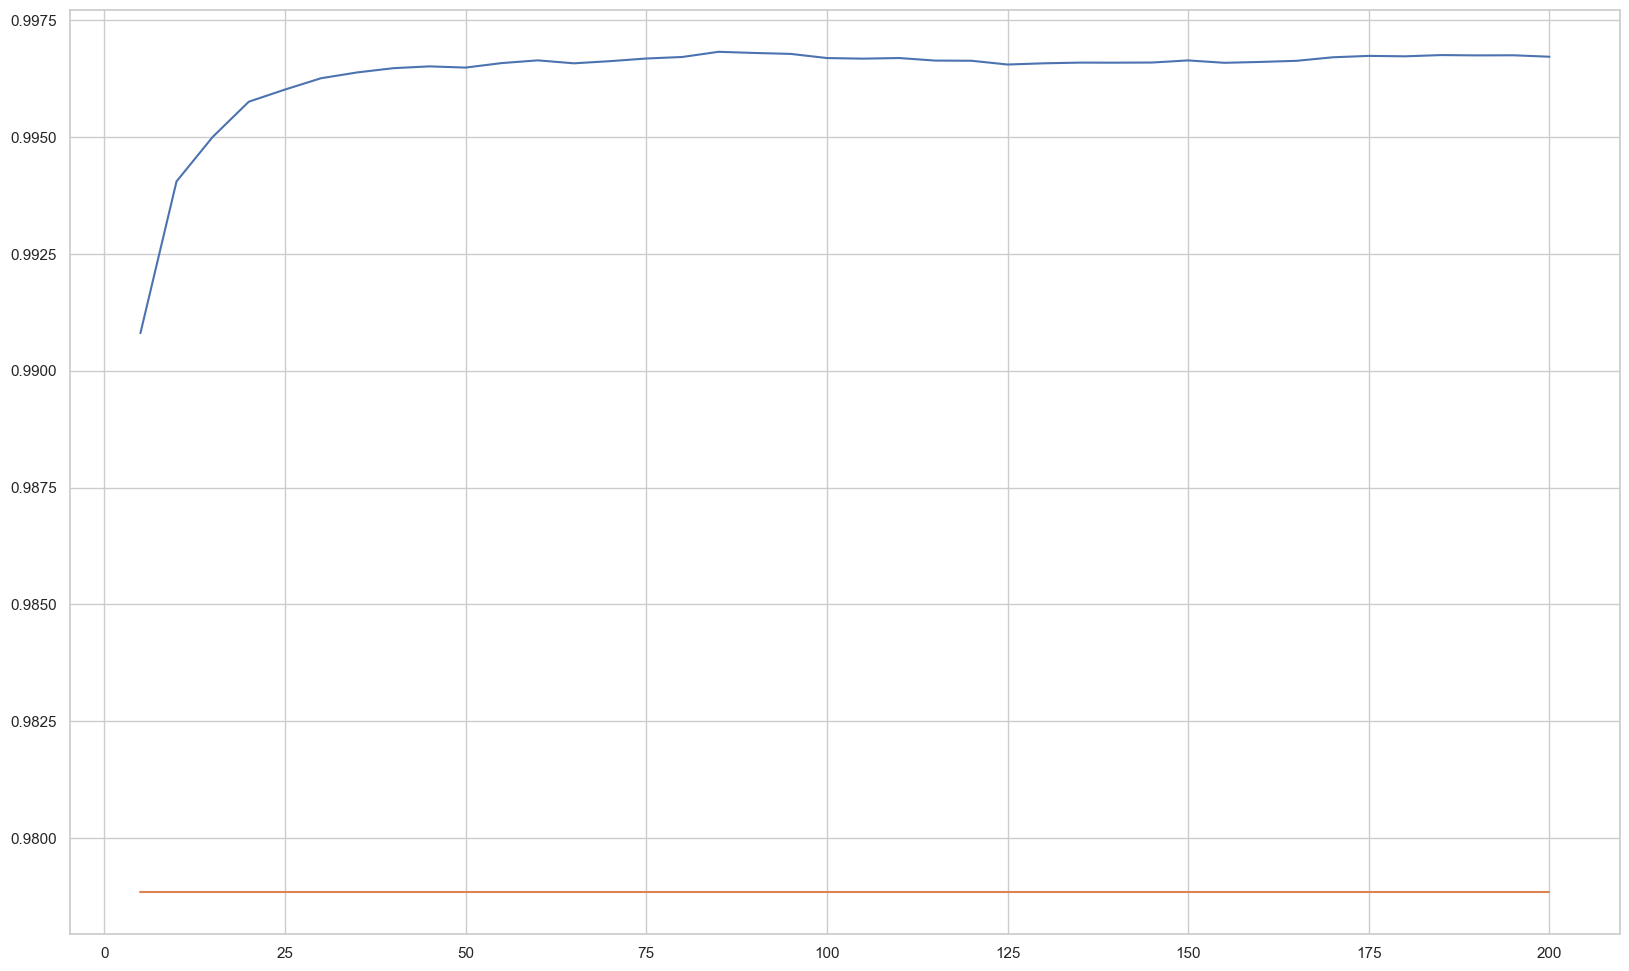

In [19]:
plt.figure(figsize=(20, 12))
sns.lineplot(np.array(list(dctr_of_scores.keys())), np.array(list(dctr_of_scores.values()))[:, 0])
sns.lineplot(np.array(list(dctr_of_scores.keys())), np.array(list(dctr_of_scores.values()))[:, 1])
plt.show()

За графіком бачимо, що оптимальним значенням кількості естіматорів є 105

Побудуємо декілька альтернативних моделей

In [24]:
%%time
adaboost5 = AdaBoostRegressor(base_estimator=dec_tr_model2, n_estimators=105, random_state=42)
adaboost5.fit(X_train, y_train)
print('Train:----------------------')
metrics(X_train, y_train, adaboost5)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, adaboost5)
print('----------------------------')

Train:----------------------
R^2 :  0.9966752113209782
RMSE:  21.879050049319567
MAPE:  0.11844934299061537
MAE :  18.70106814996099
----------------------------
Valid:----------------------
R^2 :  0.9939678544262728
RMSE:  31.619424126775538
MAPE:  0.13463541348798005
MAE :  25.302004463854338
----------------------------
Wall time: 415 ms


In [25]:
%%time
adaboost6 = AdaBoostRegressor(base_estimator=dec_tr_model2, loss='square', learning_rate=0.5, n_estimators=105, random_state=42)
adaboost6.fit(X_train, y_train)
print('Train:----------------------')
metrics(X_train, y_train, adaboost6)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, adaboost6)
print('----------------------------')

Train:----------------------
R^2 :  0.9965950427459864
RMSE:  22.141256863740843
MAPE:  0.10406754662485952
MAE :  18.258708438458537
----------------------------
Valid:----------------------
R^2 :  0.9941730226058262
RMSE:  31.077044934125723
MAPE:  0.1241386247608936
MAE :  24.010657597275873
----------------------------
Wall time: 424 ms


In [26]:
%%time
adaboost6 = AdaBoostRegressor(base_estimator=dec_tr_model2, loss='exponential', learning_rate=2, n_estimators=105, random_state=42)
adaboost6.fit(X_train, y_train)
print('Train:----------------------')
metrics(X_train, y_train, adaboost6)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, adaboost6)
print('----------------------------')

Train:----------------------
R^2 :  0.9963632345018878
RMSE:  22.88253247219612
MAPE:  0.12857890074723174
MAE :  19.5388499903346
----------------------------
Valid:----------------------
R^2 :  0.9944062521292117
RMSE:  30.448751708198603
MAPE:  0.14351894709153723
MAE :  24.55673477896535
----------------------------
Wall time: 414 ms


За допомогою решітчатого пошуку підберемо найкращу модель на валідаційному наборі даних по метриці r2

In [27]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameters = {
    'n_estimators': range(75, 126, 5),
    'loss' : ['exponential', 'square', 'linear'],
    'learning_rate': [10**x for x in range(-5, 3)]
}

In [43]:
%%time
best_model = AdaBoostRegressor(base_estimator=dec_tr_model2, random_state=42)
best_model = GridSearchCV(best_model, parameters, scoring='r2', cv=4)
best_model.fit(X_valid, y_valid)

Wall time: 2min 2s


GridSearchCV(cv=4,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                                         random_state=42),
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                           10, 100],
                         'loss': ['exponential', 'square', 'linear'],
                         'n_estimators': range(75, 126, 5)},
             scoring='r2')

In [45]:
#найкраща модель
best_model.best_estimator_

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=1, loss='exponential', n_estimators=80,
                  random_state=42)

In [46]:
#метрики найкращої моделі
print('Train:----------------------')
metrics(X_train, y_train, adaboost6)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, adaboost6)
print('----------------------------')
print('Test:-----------------------')
metrics(X_test, y_test, adaboost6)
print('----------------------------')

Train:----------------------
R^2 :  0.9963632345018878
RMSE:  22.88253247219612
MAPE:  0.12857890074723174
MAE :  19.5388499903346
----------------------------
Valid:----------------------
R^2 :  0.9944062521292117
RMSE:  30.448751708198603
MAPE:  0.14351894709153723
MAE :  24.55673477896535
----------------------------
Test:-----------------------
R^2 :  0.9915021522891567
RMSE:  33.26556210795709
MAPE:  0.11964121956948405
MAE :  26.15446635081918
----------------------------


Бачимо, що перенавчання практично відсутнє

## Висновки

В ході виконання лабораторної роботи було проведено побудовано ансамблі AdaBoost моделей регресії засобами бібліотеки sklearn на згенерованому наборі даних, для цього спочатку було виконано візуалізацію даних, побудовані базові моделі, далі були побудовані ансамблі та виконаний пошук найкращого на основі метрик, часу роботи алгоритму та за допомогоб решітчатого пошуку. Загалом ансамблі моделей є більш якісними за звичайні моделі, проте потребують більше часу на навчання, що може датися взнаки при обробці великих наборів даних